In [9]:
import pandas as pd

In [12]:
import numpy as np

In [11]:
import seaborn as sns

In [13]:
!pip install scikit-learn

In [14]:
import matplotlib.pyplot as plt

In [15]:
import sklearn

In [16]:
file_path = r"F:\Data_Science_Jupyter_Files\automobileEDA (1).csv"

In [17]:
df = pd.read_csv(file_path, header=0)

In [18]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [19]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [20]:
#Creating the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [21]:
# How could "highway-mpg" help us predict car price?

#For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.
X = df[["highway-mpg"]]
Y = df["price"]

In [22]:
#Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [23]:
#We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [24]:
#What is the value of the intercept (a)?
lm.intercept_

np.float64(38423.3058581574)

In [25]:
#What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

In [27]:
#What is the final estimated linear model we get?
Yhat = 38423.31 -821.73*df["highway-mpg"]
Yhat

0      16236.60
1      16236.60
2      17058.33
3      13771.41
4      20345.25
         ...   
196    15414.87
197    17880.06
198    19523.52
199    16236.60
200    17880.06
Name: highway-mpg, Length: 201, dtype: float64

In [28]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [29]:
X = df[["engine-size"]]
Y = df["price"]
lm1.fit(X,Y)

LinearRegression()

In [30]:
Yhat = lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [31]:
lm1.intercept_

np.float64(-7963.338906281024)

In [32]:
lm1.coef_

array([166.86001569])

In [33]:
Yhat = -7963.34 + 166.86*df["engine-size"]
Yhat

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

In [34]:
#Multiple Linear Regression
#Let's develop a model using these variables as the predictor variables.
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

In [35]:
#Fit the linear model using the four above-mentioned variables
lm.fit(Z,df["price"])

LinearRegression()

In [36]:
#value of the intercept(a)
lm.intercept_

np.float64(-15806.62462632923)

In [37]:
#values of the coefficients (b1, b2, b3, b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [38]:
Yhat = -15806.62 + 53.49*df["horsepower"] + 4.70*df["curb-weight"] + 81.53*df["engine-size"] + 36.05*df["highway-mpg"]
Yhat.head()

0    13678.62
1    13678.62
2    19028.80
3    10601.53
4    15498.71
dtype: float64

In [39]:
nl_hm = df[["normalized-losses", "highway-mpg"]]

In [40]:
lm2 = LinearRegression()
lm2.fit(nl_hm, df["price"])

LinearRegression()

In [42]:
lm2.intercept_

np.float64(38201.31327245727)

In [43]:
lm2.coef_

array([   1.49789586, -820.45434016])

(0.0, 48194.176554878395)

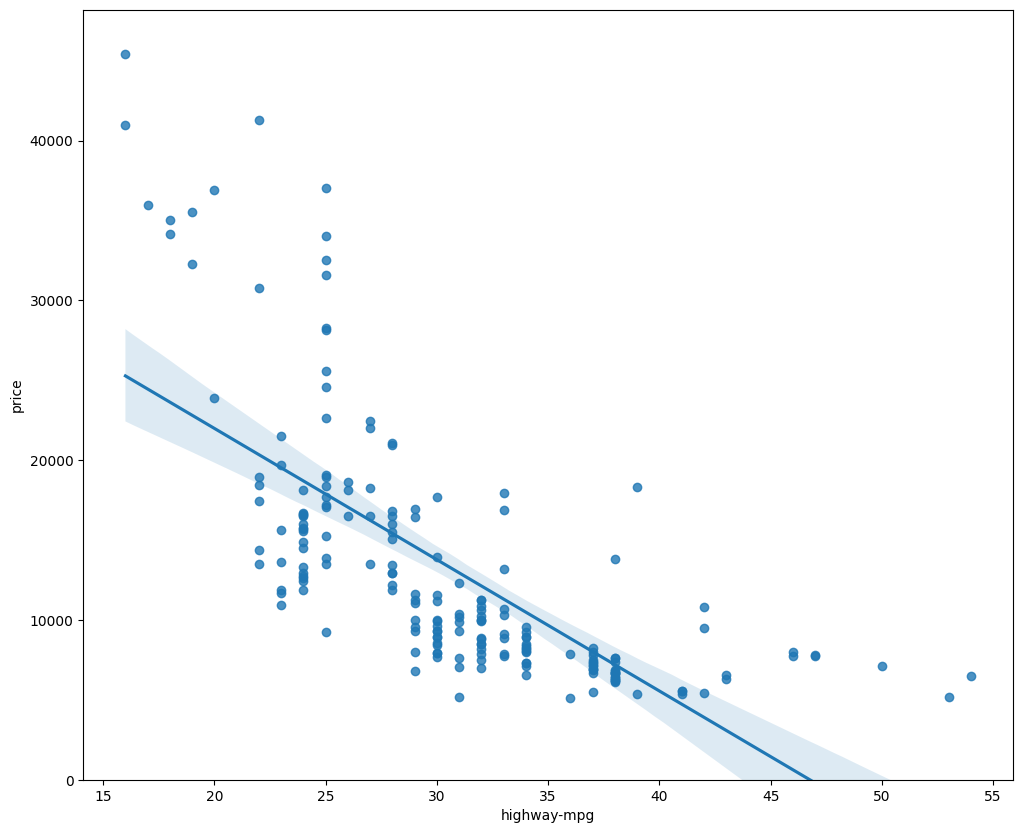

In [44]:
#Model Evaluation Using Visualization
#Regression Plot
#Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

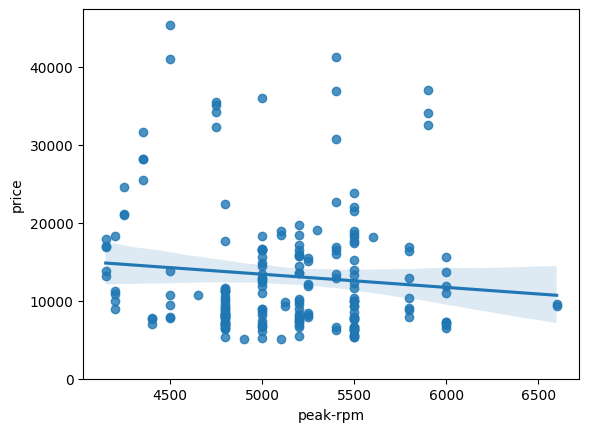

In [50]:
#Let's compare this plot to the regression plot of "peak-rpm"
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [34]:
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


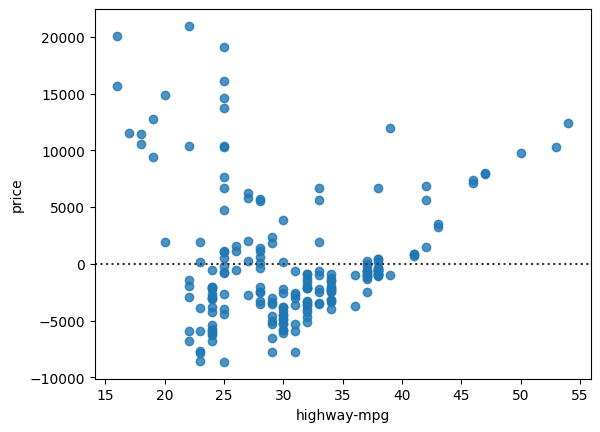

In [35]:
#Residual Plot
sns.residplot(x=df["highway-mpg"], y=df["price"], data=df)
plt.show()

In [36]:
# Visualizing a model for Multiple Linear Regression
Y_hat = lm.predict(Z)

C:\Users\HP\AppData\Local\Temp\ipykernel_31536\313409563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_31536\313409563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

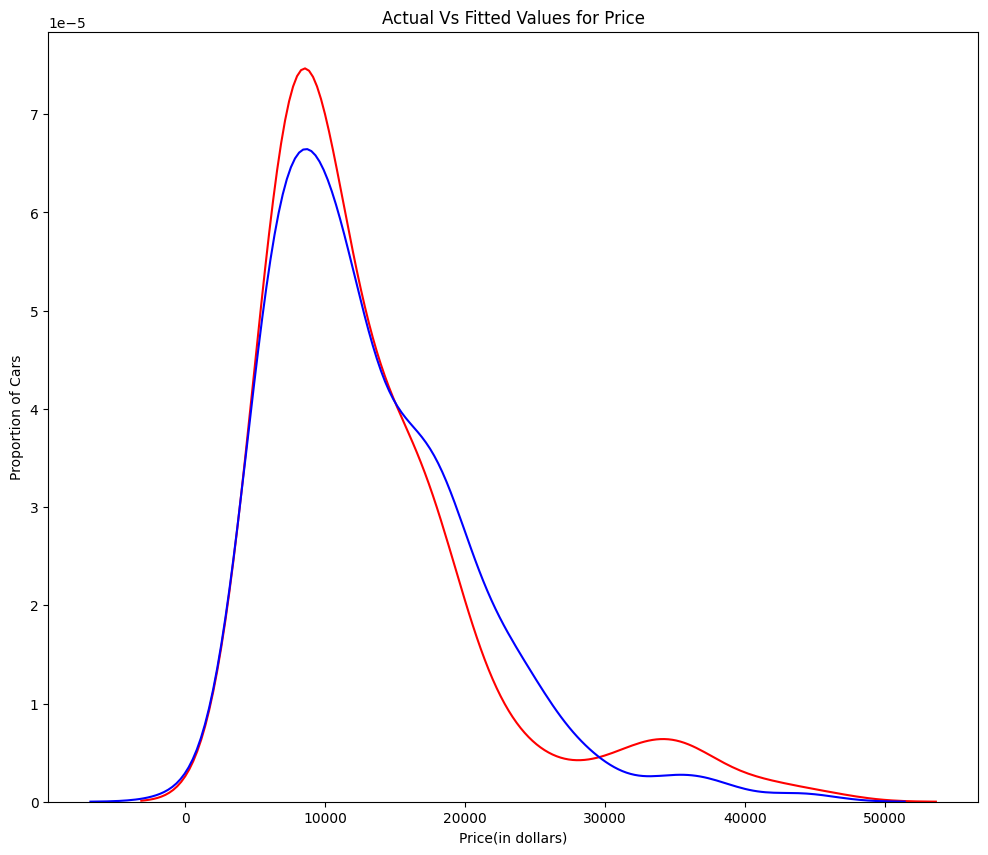

In [37]:
plt.figure(figsize=(width,height))
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual Vs Fitted Values for Price")
plt.xlabel("Price(in dollars)")
plt.ylabel("Proportion of Cars")
plt.show()

In [45]:
# Polynomial Regression
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title("Polynomial Fit with Matplotlib for Price~Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    plt.show()
    plt.close()

In [46]:
x = df["highway-mpg"]
y = df["price"]

In [47]:
# fitting the polynomial using the function polyfit, then using the function poly1d to display the polynomial function.
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


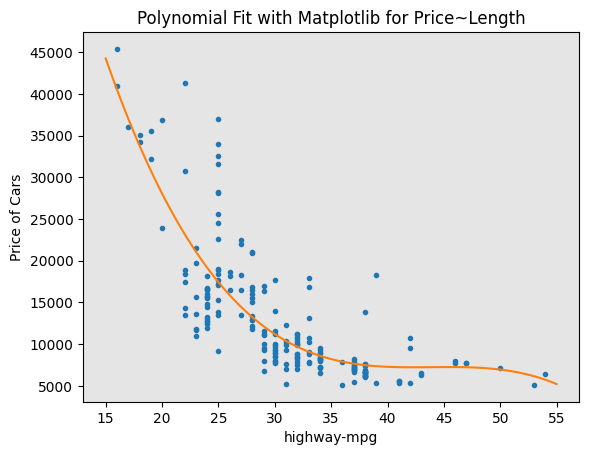

In [48]:
# plotting the function
PlotPolly(p, x, y, "highway-mpg")

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


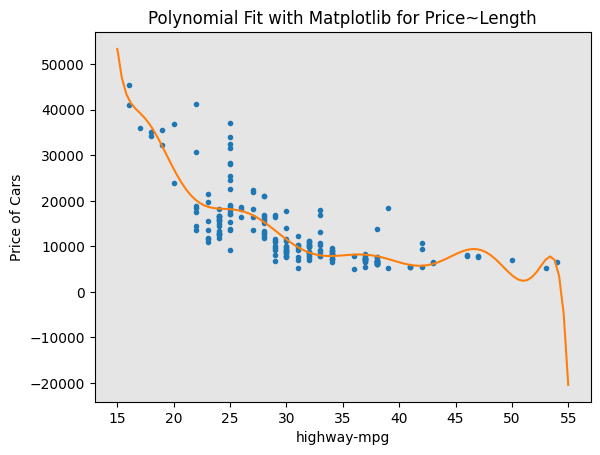

In [49]:
# Creating 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, "highway-mpg")

In [52]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
# We create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree = 2)

In [54]:
pr

PolynomialFeatures()

In [55]:
Z_pr = pr.fit_transform(Z)

In [58]:
Z.shape

(201, 4)

In [59]:
Z_pr.shape

(201, 15)

In [72]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input = [("Scale", StandardScaler()),
        ("Polynomial", PolynomialFeatures(include_bias=False)),
        ("model", LinearRegression())]
pipe = Pipeline(Input)
pipe
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [73]:
# Model 1: Simple Linear Regression
# Let's calculate the R^2:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print("The r-square is: ", lm.score(X, Y))

The r-square is:  0.7609686443622008


In [74]:
# Let's calculate the MSE:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat = lm.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [75]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [76]:
# We can compare the predicted results with the actual results:
mse = mean_squared_error(df["price"], Yhat)
print("The mean squared error of price and predicted value is: ", mse)

The mean squared error of price and predicted value is:  15021126.02517414


In [77]:
# Model 2: Multiple Linear Regression
# Let's calculate the R^2:

lm.fit(Z, df["price"])
print("The r-square is: ", lm.score(Z, df["price"]))

The r-square is:  0.8093562806577457


In [79]:
# Let's calculate the MSE

Y_predict_multifit = lm.predict(Z)
Y_predict_multifit[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

In [81]:
# We compare the predicted results with the actual results:
mse_mlr = mean_squared_error(df["price"], Y_predict_multifit)
print("The mean squared error of price and predicted value is: ", mse_mlr)

The mean squared error of price and predicted value is:  11980366.87072649


In [82]:
# Model 3: Polynomial Fit
# Let's calculate the R^2.
# Let’s import the function r2_score from the module metrics as we are using a different function.

from sklearn.metrics import r2_score

In [84]:
r_squared = r2_score(df["price"], p(df["highway-mpg"]))
print("The r-square is: ", r_squared)

The r-square is:  0.674194666390652


In [85]:
# We can also calculate the MSE:
mean_squared_error(df["price"], p(df["highway-mpg"]))

20474146.426361218

In [87]:
# Prediction

%matplotlib inline

In [88]:
# Create a new input:
new_input = np.arange(1, 100, 1).reshape(-1,1)

In [89]:
# Fit the model:
lm.fit(X, Y)
lm

LinearRegression()

In [90]:
# Produce a prediction:
yhat = lm.predict(new_input)
yhat[0:5]

F:\Miniconda\envs\py312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

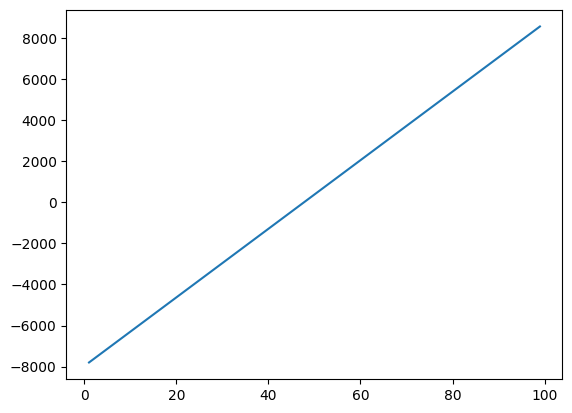

In [91]:
# We can plot the data:
plt.plot(new_input, yhat)
plt.show()